In [1]:
"""This code takes some time to run due to the high number of sampled data points
and the high switching rates
Decrease T = 1000000 for quicker but less accurate empirical PDF
or reduce the number of eval_points from 1000 e.g. to 100"""

#importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

#getting current directory
import os
cwd = os.getcwd()

#importing all the functions contained in "functions.py"
%run ../functions

In [2]:
#time lengths
delta_t = 0.3 
T = 1000000

#define parameters of the six-state model with lambdax10
V = np.array([2000, -1500, 0, 0, 0, 0])
Lambda = np.array([1, 0.5, 0.3, 2, 2.2, 1.8])*10
P = np.array([[0.0, 0.0, 0.0, 0.2, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.6, 0.4],
              [0.6, 0.4, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.2, 0.0, 0.0, 0.0]])
sigma = 50
n = Lambda.shape[0]

#running the model
x_sim, y_sim, t_sim, sw, st = n_state_model(delta_t, T, V, Lambda, P, sigma)

#constructing the increments
delta_y = np.array([y_sim[i]-y_sim[i-1] for i in range(1, len(y_sim))])

#define points for which we need the PDF approximation    
eval_points = np.linspace(np.min(delta_y), np.max(delta_y), 1000)

#compute the PDF approximation - up-to-one-switch
approx_pdf_res = approx_pdf_up_to_1_switch(V, Lambda, P, sigma, delta_t, eval_points)

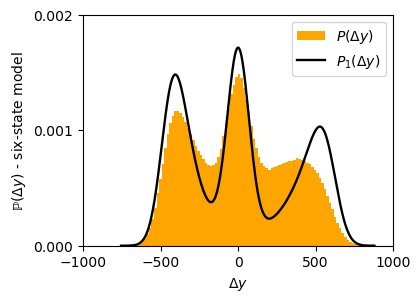

In [4]:
plt.figure(figsize=(4,3))
plt.hist(delta_y, bins=100, density=True, color='orange', label='$P(\Delta y)$')
plt.plot(eval_points, approx_pdf_res, color='black', linewidth=1.7, label=r'$P_1(\Delta y)$')
plt.xlabel(r'$\Delta y$')
plt.ylabel(r'$\mathrm{\mathbb{P}}(\Delta y)$ - six-state model')
plt.xlim([-1000,1000])
plt.yticks([0.000, 0.001, 0.002])
plt.legend()
plt.savefig("PDF_comparison_6_ratesx10.png", format="png", dpi=1200, bbox_inches="tight") 